In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
#read the dataset
gameFile = pd.read_csv('Steam Games.csv')

In [4]:
gameFile.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

<h2>Data Preprocessing </h2>
<ul>
<li>drop columns/variables that are not relevants</li>
 <li>recode categorical to binary variable</li>
 <li> drop rows with null values </li>
</ul>
 


In [5]:
#drop irrelevant columns
gameEdited = gameFile.drop(columns=['Header image',
                                    'About the game',
                                    'Reviews',
                                    'Website',
                                    'Support url',
                                    'Screenshots',
                                    'Movies',
                                    'Notes',
                                    'Supported languages',
                                    'Full audio languages',
                                    'Required age',
                                    
                                    'Support email',
                                    'Metacritic url'
                                    ])

In [6]:
gameEdited.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,DLC count,Windows,Mac,Linux,...,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,19.99,0,True,False,False,...,0,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0.99,0,True,True,False,...,0,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,4.99,0,True,False,False,...,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,5.99,0,True,True,True,...,0,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0.00,0,True,True,False,...,0,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."


In [7]:
#convert True/False to 1/0
gameEdited['Windows'] = gameEdited['Windows'].astype(int)
gameEdited['Mac'] = gameEdited['Mac'].astype(int)
gameEdited['Linux'] = gameEdited['Linux'].astype(int)

In [27]:
#drop rows with null values of game name
gameEdited = gameEdited.dropna(subset=['Name'])
gameEdited.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,DLC count,Windows,Mac,Linux,...,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,19.99,0,1,0,0,...,0,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0.99,0,1,1,0,...,0,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,4.99,0,1,0,0,...,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,1355720,Henosis™,2020-07-23,0 - 20000,0,5.99,0,1,1,1,...,0,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0.00,0,1,1,0,...,0,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."


In [10]:
# gameEdited.to_csv('Steam Games Edited.csv', index=False)

<h3>
Finding the most popular game genre </h3>

In [11]:
#analyze the genres of the games

#create a dictionary to store the genres and their counts separate by comma
genre_names = {}
for i in gameEdited['Genres']:
    if pd.isnull(i):
        continue
    genres = i.split(',')
    for genre in genres:
        if genre in genre_names:
            genre_names[genre] += 1
        else:
            genre_names[genre] = 1

genre_names

{'Casual': 34208,
 'Indie': 56929,
 'Sports': 3790,
 'Action': 33808,
 'Adventure': 31450,
 'Strategy': 15602,
 'Free to Play': 6630,
 'Massively Multiplayer': 2177,
 'RPG': 14439,
 'Simulation': 16146,
 'Early Access': 10403,
 'Racing': 3095,
 'Utilities': 846,
 'Education': 399,
 'Sexual Content': 108,
 'Nudity': 120,
 'Violent': 527,
 'Gore': 311,
 'Design & Illustration': 500,
 'Animation & Modeling': 414,
 'Game Development': 238,
 'Web Publishing': 110,
 'Software Training': 207,
 'Photo Editing': 137,
 'Audio Production': 202,
 'Video Production': 290,
 'Accounting': 23,
 'Movie': 2,
 'Documentary': 1,
 'Episodic': 1,
 'Short': 1,
 'Tutorial': 1,
 '360 Video': 1}

In [12]:
#sort the dictionary by values
sorted_genre_names = dict(sorted(genre_names.items(), key=lambda x: x[1], reverse=True))

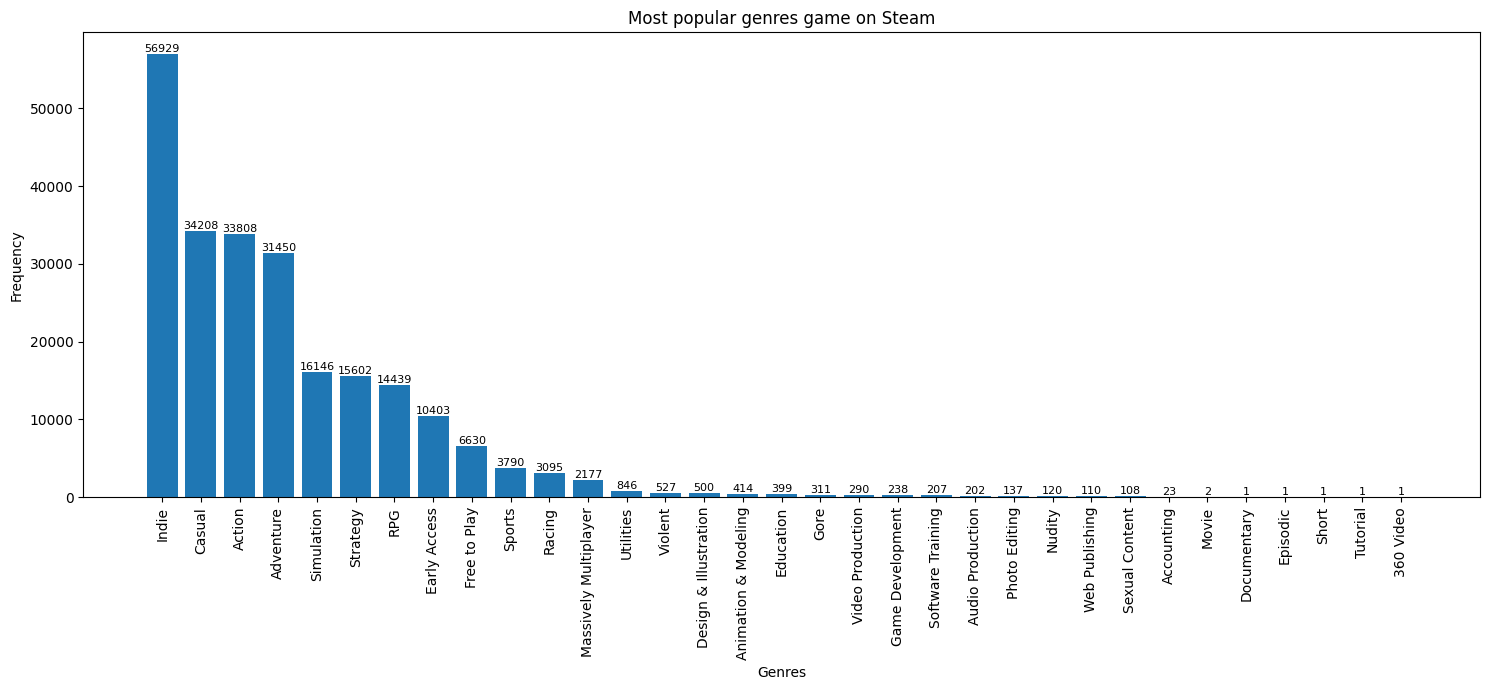

In [13]:
#graph the values
# Extract keys (genres) and values (frequencies) from the dictionary
genres = list(sorted_genre_names.keys())
frequencies = list(sorted_genre_names.values())

# Plotting
plt.figure(figsize=(15, 7))
bars = plt.bar(genres, frequencies)
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Most popular genres game on Steam')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# Annotate each bar with its corresponding frequency
for bar, frequency in zip(bars, frequencies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
             f'{frequency}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

<h3>Finding the most popular game category</h3>

In [14]:
category_names = {}
for i in gameEdited['Categories']:
    if pd.isnull(i):
        continue
    categories = i.split(',')
    for category in categories:
        if category in category_names:
            category_names[category] += 1
        else:
            category_names[category] = 1

category_names

{'Single-player': 76421,
 'Multi-player': 15595,
 'Steam Achievements': 36804,
 'Partial Controller Support': 10589,
 'Full controller support': 15993,
 'Steam Leaderboards': 6815,
 'Remote Play on Phone': 822,
 'Remote Play on Tablet': 983,
 'Remote Play on TV': 2166,
 'MMO': 1292,
 'PvP': 9846,
 'Online PvP': 7036,
 'Co-op': 7817,
 'Online Co-op': 4466,
 'In-App Purchases': 2299,
 'Steam Cloud': 18817,
 'Steam Trading Cards': 9889,
 'Shared/Split Screen': 5683,
 'Cross-Platform Multiplayer': 2336,
 'Remote Play Together': 6169,
 'Stats': 3579,
 'Shared/Split Screen PvP': 4078,
 'Captions available': 1188,
 'Steam Workshop': 1862,
 'Includes level editor': 1968,
 'LAN PvP': 707,
 'LAN Co-op': 611,
 'Shared/Split Screen Co-op': 3189,
 'Steam Turn Notifications': 92,
 'VR Support': 250,
 'SteamVR Collectibles': 41,
 'Valve Anti-Cheat enabled': 124,
 'Includes Source SDK': 51,
 'Commentary available': 239,
 'Mods (require HL2)': 2,
 'Mods': 2,
 'Tracked Motion Controller Support': 1,
 'T

In [15]:
#sort the category dictionary by values
sorted_category_names = dict(sorted(category_names.items(), key=lambda x: x[1], reverse=True))
sorted_category_names

{'Single-player': 76421,
 'Steam Achievements': 36804,
 'Steam Cloud': 18817,
 'Full controller support': 15993,
 'Multi-player': 15595,
 'Partial Controller Support': 10589,
 'Steam Trading Cards': 9889,
 'PvP': 9846,
 'Co-op': 7817,
 'Online PvP': 7036,
 'Steam Leaderboards': 6815,
 'Remote Play Together': 6169,
 'Shared/Split Screen': 5683,
 'Online Co-op': 4466,
 'Shared/Split Screen PvP': 4078,
 'Stats': 3579,
 'Shared/Split Screen Co-op': 3189,
 'Cross-Platform Multiplayer': 2336,
 'In-App Purchases': 2299,
 'Remote Play on TV': 2166,
 'Includes level editor': 1968,
 'Steam Workshop': 1862,
 'MMO': 1292,
 'Captions available': 1188,
 'Remote Play on Tablet': 983,
 'Remote Play on Phone': 822,
 'LAN PvP': 707,
 'VR Only': 679,
 'LAN Co-op': 611,
 'Tracked Controller Support': 341,
 'VR Support': 250,
 'Commentary available': 239,
 'Valve Anti-Cheat enabled': 124,
 'VR Supported': 104,
 'Steam Turn Notifications': 92,
 'Includes Source SDK': 51,
 'SteamVR Collectibles': 41,
 'HDR a

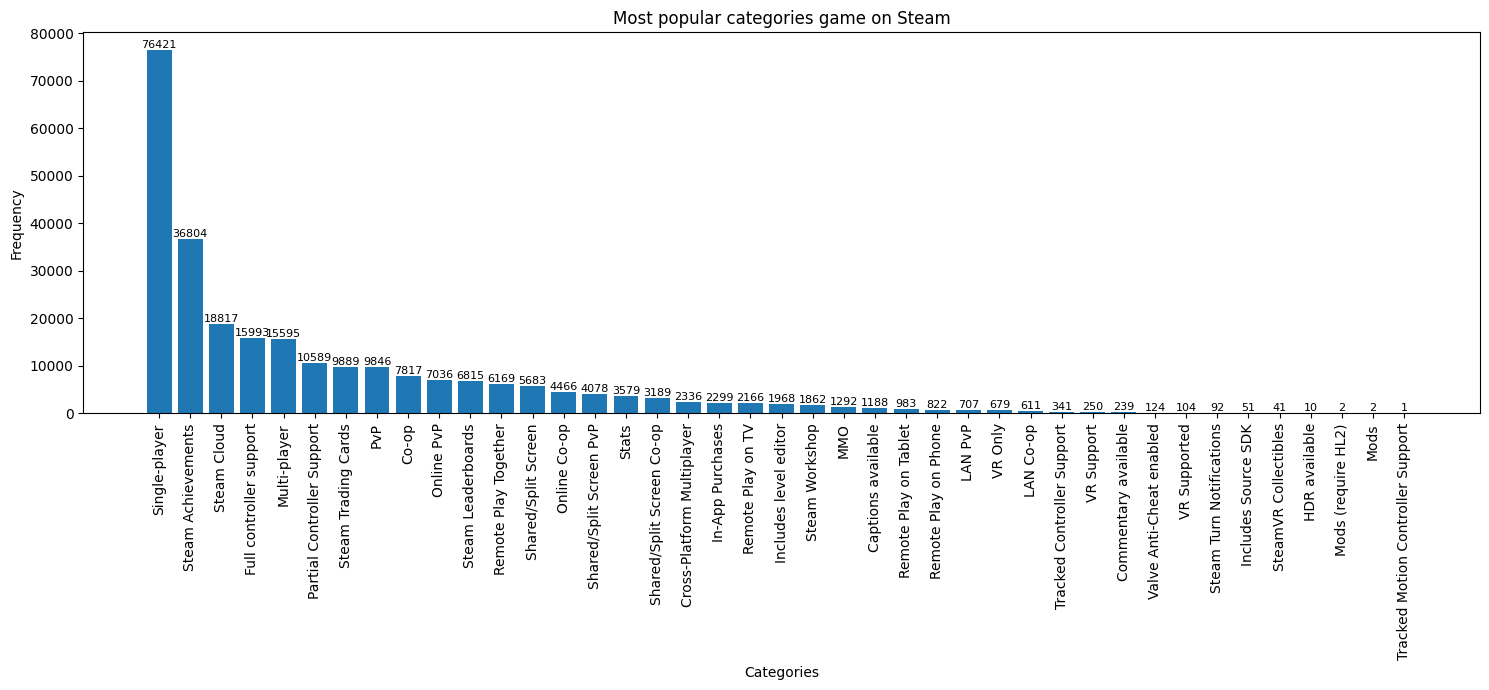

In [16]:
#plot the game category
# Extract keys (categories) and values (frequencies) from the dictionary  
categories = list(sorted_category_names.keys())
frequencies = list(sorted_category_names.values())

plt.figure(figsize=(15, 7))
bars = plt.bar(categories, frequencies)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Most popular categories game on Steam') 
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# Annotate each bar with its corresponding frequency
for bar, frequency in zip(bars, frequencies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
             f'{frequency}', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

<h3>Finding the most popular specific game by tag</h3>

In [17]:
#analyze the game tags
tag_names = {}
for i in gameEdited['Tags']:
    if pd.isnull(i):
        continue
    tags = i.split(',')
    for tag in tags:
        if tag in tag_names:
            tag_names[tag] += 1
        else:
            tag_names[tag] = 1
tag_names

{'Indie': 40252,
 'Casual': 27509,
 'Sports': 3233,
 'Bowling': 38,
 'Action': 28794,
 'Pixel Graphics': 9178,
 '2D': 17505,
 'Retro': 6426,
 'Arcade': 7768,
 'Score Attack': 1874,
 'Minimalist': 3766,
 'Comedy': 4170,
 'Singleplayer': 33153,
 'Fast-Paced': 1647,
 'Funny': 6753,
 'Parody': 437,
 'Difficult': 5262,
 'Gore': 3510,
 'Violent': 4088,
 'Western': 259,
 'Controller': 4173,
 'Blood': 425,
 '2D Platformer': 3930,
 'Atmospheric': 11213,
 'Surreal': 1753,
 'Mystery': 3754,
 'Puzzle': 11406,
 'Survival': 4745,
 'Adventure': 26847,
 'Linear': 3454,
 'Experimental': 1138,
 'Platformer': 6386,
 'Precision Platformer': 1393,
 'Puzzle-Platformer': 2801,
 'Stylized': 4242,
 'Physics': 3746,
 'Time Manipulation': 416,
 'Nudity': 2670,
 'Sexual Content': 2733,
 'Story Rich': 8996,
 'Turn-Based Combat': 2165,
 'Massively Multiplayer': 1645,
 'Multiplayer': 7868,
 'RPG': 11964,
 'Tactical RPG': 936,
 'Exploration': 7901,
 'PvP': 3315,
 'MMORPG': 427,
 'Turn-Based Strategy': 2395,
 'God Gam

In [18]:
#sort the tag dictionary by values
sorted_tag_names = dict(sorted(tag_names.items(), key=lambda x: x[1], reverse=True))
sorted_tag_names

{'Indie': 40252,
 'Singleplayer': 33153,
 'Action': 28794,
 'Casual': 27509,
 'Adventure': 26847,
 '2D': 17505,
 'Strategy': 13616,
 'Simulation': 13423,
 'RPG': 11964,
 'Puzzle': 11406,
 'Atmospheric': 11213,
 '3D': 9971,
 'Early Access': 9329,
 'Pixel Graphics': 9178,
 'Story Rich': 8996,
 'Colorful': 8876,
 'Cute': 8045,
 'Exploration': 7901,
 'Multiplayer': 7868,
 'Arcade': 7768,
 'First-Person': 7679,
 'Fantasy': 7574,
 'Funny': 6753,
 'Shooter': 6630,
 'Retro': 6426,
 'Platformer': 6386,
 'Horror': 6226,
 'Family Friendly': 6102,
 'Anime': 6095,
 'Sci-fi': 5988,
 'Relaxing': 5777,
 'Action-Adventure': 5639,
 'Difficult': 5262,
 'VR': 5260,
 'Female Protagonist': 5247,
 'Survival': 4745,
 'Third Person': 4729,
 'Open World': 4627,
 'Top-Down': 4461,
 'Great Soundtrack': 4453,
 'Stylized': 4242,
 'Controller': 4173,
 'Comedy': 4170,
 'Combat': 4113,
 'Violent': 4088,
 'Free to Play': 4082,
 'FPS': 4027,
 'Visual Novel': 4018,
 'Co-op': 3933,
 '2D Platformer': 3930,
 'Minimalist': 3

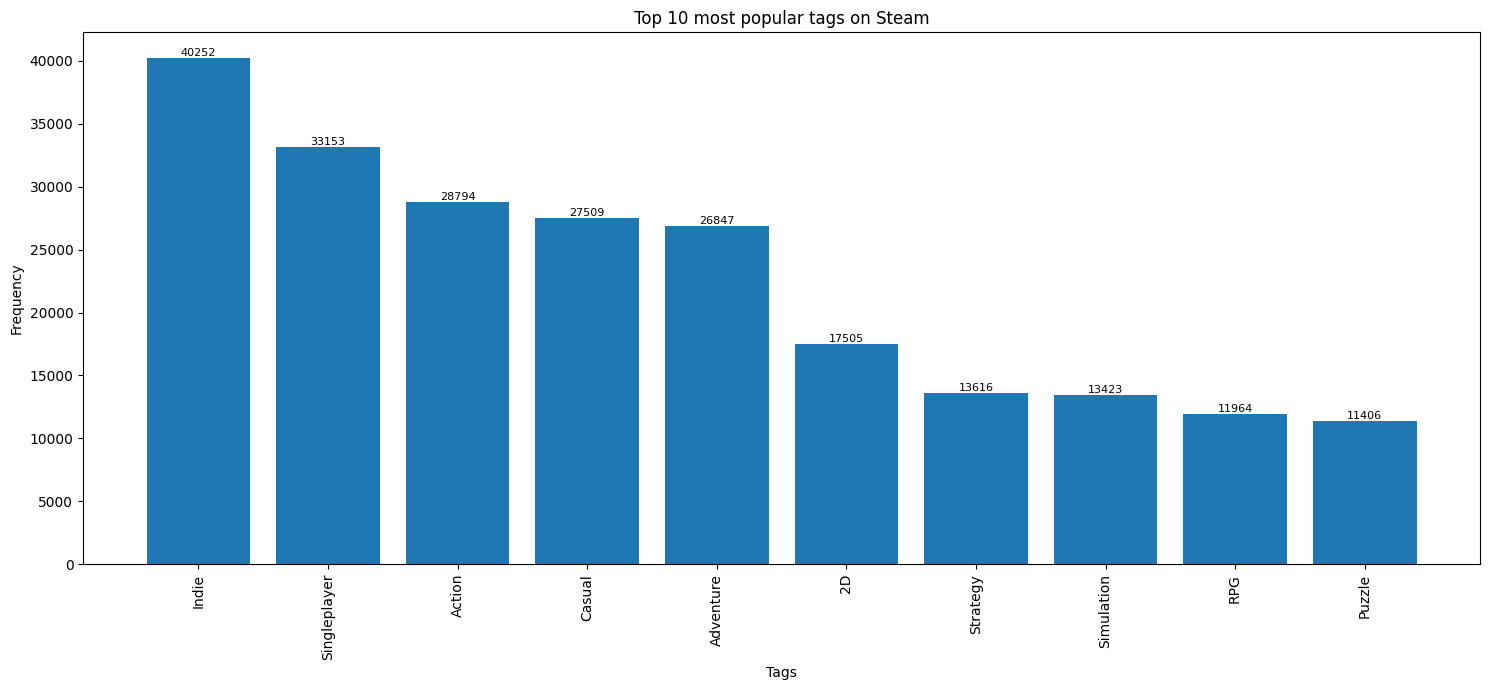

In [19]:
#plot the game tags by most popular game tags
# Extract keys (tags) and values (frequencies) from the dictionary
tags = list(sorted_tag_names.keys())
frequencies = list(sorted_tag_names.values())

plt.figure(figsize=(15, 7))
bars = plt.bar(tags[:10], frequencies[:10])
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Top 10 most popular tags on Steam')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# Annotate each bar with its corresponding frequency
for bar, frequency in zip(bars, frequencies[:10]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
             f'{frequency}', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

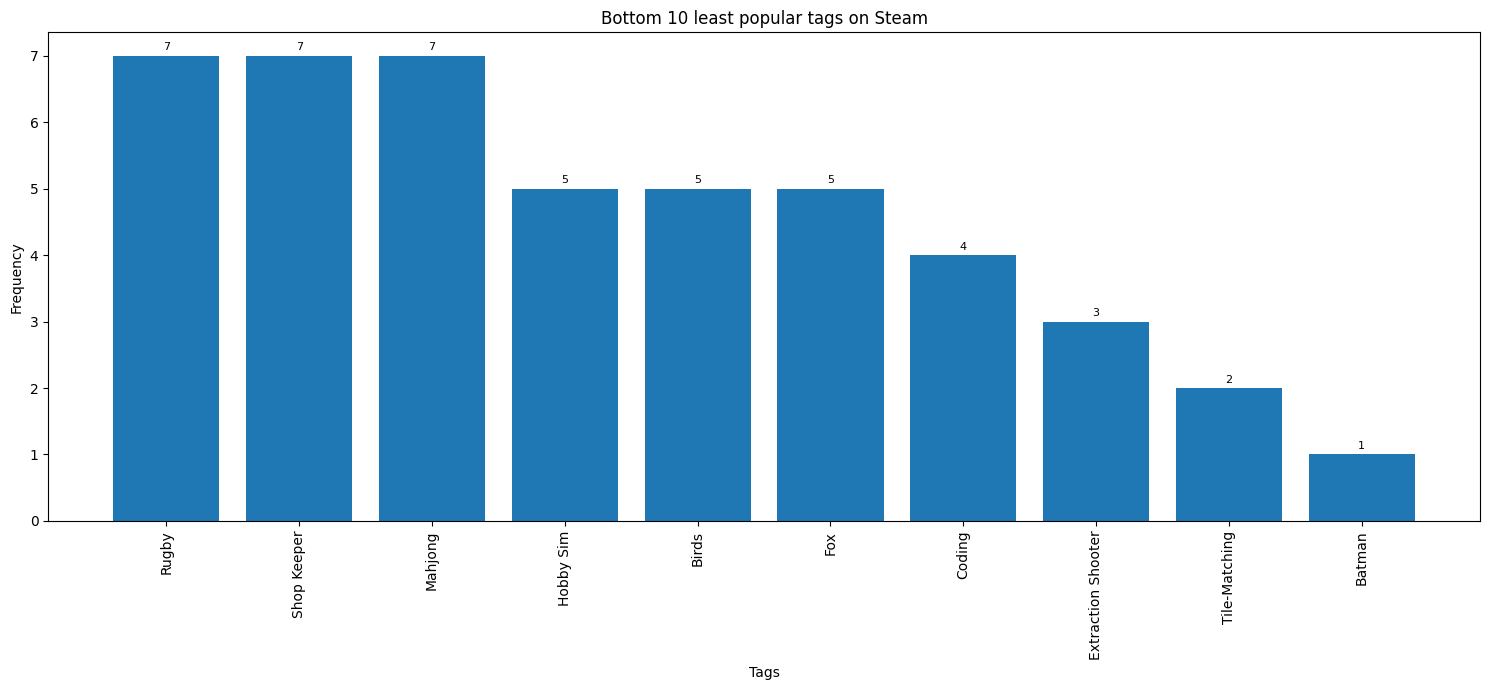

In [20]:
plt.figure(figsize=(15, 7))
bars = plt.bar(tags[-10:], frequencies[-10:])
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Bottom 10 least popular tags on Steam')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# Annotate each bar with its corresponding frequency
for bar, frequency in zip(bars, frequencies[-10:]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
             f'{frequency}', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

Popular games throughout the years

In [21]:
#format date
gameEdited['Release date'] = pd.to_datetime(gameEdited['Release date'], errors='coerce')

/var/folders/qv/p7xylylx0sdg17lvn87t9b6h0000gn/T/ipykernel_43429/734494914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gameEdited['Release date'] = pd.to_datetime(gameEdited['Release date'], errors='coerce')


In [22]:
gameFile['Publishers'].head(20)

0             Perpetual FX Creative
1                      Wild Rooster
2                     Campião Games
3                 Odd Critter Games
4                     Unusual Games
5                             7Road
6                     MAKSIM VOLKAU
7                        magnussoft
8                     CFK Co., Ltd.
9                    ONE MORE LEVEL
10    Pixelated Milk,gaming company
11           Wise Wizard Games, LLC
12                   Beardlings LLC
13                Educational Games
14                  Parange Project
15               Team17 Digital Ltd
16                         Ziggurat
17                    Lonely Troops
18                        Denpasoft
19                         Necavare
Name: Publishers, dtype: object

date trend that has the most releasing games

In [23]:
#define dates 

dates = {}
for i in gameEdited['Release date']:
    if pd.isnull(i):
        continue
    year = i.year
    if year in dates:
        dates[year] += 1
    else:
        dates[year] = 1
#sort the dates dictionary by values
sorted_dates = dict(sorted(dates.items(), key=lambda x: x[0], reverse=False))
sorted_dates

{1997: 2,
 1998: 1,
 1999: 3,
 2000: 2,
 2001: 4,
 2002: 1,
 2003: 3,
 2004: 7,
 2005: 7,
 2006: 69,
 2007: 109,
 2008: 176,
 2009: 339,
 2010: 300,
 2011: 286,
 2012: 355,
 2013: 490,
 2014: 1627,
 2015: 2683,
 2016: 4406,
 2017: 6324,
 2018: 8166,
 2019: 7808,
 2020: 9626,
 2021: 12374,
 2022: 13978,
 2023: 15540,
 2024: 280,
 2025: 1}

visualize the date trends

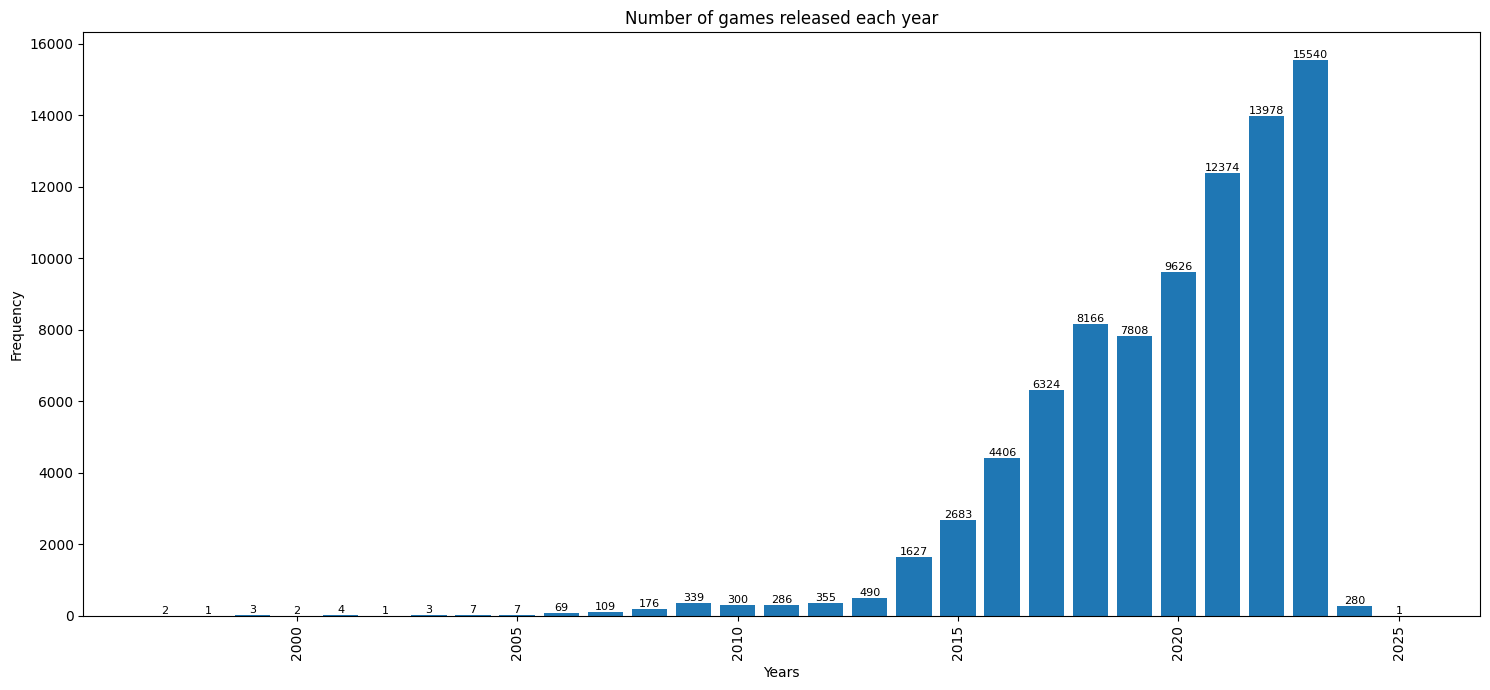

In [24]:
#visualize the release date of the games
# Extract keys (years) and values (frequencies) from the dictionary
years = list(sorted_dates.keys())
frequencies = list(sorted_dates.values())

plt.figure(figsize=(15, 7))
bars = plt.bar(years, frequencies)
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Number of games released each year')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# Annotate each bar with its corresponding frequency
for bar, frequency in zip(bars, frequencies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
             f'{frequency}', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

game genre by dates

In [25]:
#analyze game genres by year
# Create a dictionary to store the genres and their counts for each year
genre_names_by_year = {}
for i in range(len(gameEdited)):
    genres = gameEdited['Genres'].iloc[i]
    if pd.isnull(genres):
        continue
    year = gameEdited['Release date'].iloc[i].year
    genres = genres.split(',')
    if year not in genre_names_by_year:
        genre_names_by_year[year] = {}
    for genre in genres:
        if genre in genre_names_by_year[year]:
            genre_names_by_year[year][genre] += 1
        else:
            genre_names_by_year[year][genre] = 1
genre_names_by_year

{2008: {'Casual': 42,
  'Indie': 26,
  'Sports': 3,
  'Strategy': 37,
  'RPG': 15,
  'Simulation': 23,
  'Adventure': 31,
  'Action': 69,
  'Racing': 12,
  'Free to Play': 2},
 2017: {'Action': 2778,
  'Indie': 4473,
  'Adventure': 2393,
  'Casual': 2504,
  'Racing': 226,
  'Simulation': 1193,
  'RPG': 906,
  'Strategy': 1149,
  'Sports': 353,
  'Free to Play': 419,
  'Early Access': 626,
  'Nudity': 62,
  'Violent': 270,
  'Utilities': 92,
  'Education': 64,
  'Gore': 164,
  'Massively Multiplayer': 180,
  'Animation & Modeling': 56,
  'Software Training': 21,
  'Sexual Content': 51,
  'Video Production': 47,
  'Design & Illustration': 78,
  'Audio Production': 28,
  'Web Publishing': 16,
  'Accounting': 6,
  'Photo Editing': 18,
  'Game Development': 7,
  'Movie': 1},
 2021: {'Action': 4659,
  'Adventure': 4646,
  'Indie': 8174,
  'Strategy': 2145,
  'Casual': 5170,
  'Free to Play': 1001,
  'Massively Multiplayer': 295,
  'RPG': 2113,
  'Utilities': 110,
  'Early Access': 1526,
  'R

In [26]:
#keeping only the top 5 genres for each year
top_genres_by_year = {}
for year in genre_names_by_year:
    top_genres_by_year[year] = dict(sorted(genre_names_by_year[year].items(), key=lambda x: x[1], reverse=True)[:5])
top_genres_by_year

{2008: {'Action': 69,
  'Casual': 42,
  'Strategy': 37,
  'Adventure': 31,
  'Indie': 26},
 2017: {'Indie': 4473,
  'Action': 2778,
  'Casual': 2504,
  'Adventure': 2393,
  'Simulation': 1193},
 2021: {'Indie': 8174,
  'Casual': 5170,
  'Action': 4659,
  'Adventure': 4646,
  'Simulation': 2308},
 2020: {'Indie': 7129,
  'Casual': 4191,
  'Action': 4065,
  'Adventure': 3717,
  'Simulation': 2006},
 2022: {'Indie': 8722,
  'Casual': 5689,
  'Adventure': 5107,
  'Action': 5104,
  'Simulation': 2562},
 2014: {'Indie': 915,
  'Action': 669,
  'Adventure': 593,
  'Casual': 426,
  'Strategy': 353},
 2019: {'Indie': 5907,
  'Casual': 3262,
  'Action': 3235,
  'Adventure': 3046,
  'Simulation': 1534},
 2016: {'Indie': 3089,
  'Action': 1918,
  'Casual': 1629,
  'Adventure': 1602,
  'Simulation': 851},
 2018: {'Indie': 6207,
  'Casual': 3613,
  'Action': 3414,
  'Adventure': 2957,
  'Simulation': 1615},
 2010: {'Action': 120,
  'Casual': 76,
  'Indie': 68,
  'Strategy': 65,
  'Adventure': 60},
 